## Preparing the dataset

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import re

In [92]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pass_id = test['PassengerId']

In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
#make a copy if the original dataframe since we are going to do things to the train dataframe
original_train =  train.copy()

In [95]:
full_data = [train,test]

In [96]:
train['Has_Cabin'] = train['Cabin'].apply(lambda x : 0 if type(x) == float else 1)

In [97]:
test['Has_Cabin'] = test['Cabin'].apply(lambda x : 0 if type(x) == float else 1)

In [98]:
#Add more features, family size,is Alone, remove nulls in embarked column, remove nulls in fare, 
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1

In [99]:
for dataset in full_data:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1

In [100]:
for dataset in full_data:
    dataset['Fare']=dataset['Fare'].fillna(train['Fare'].median())

In [101]:
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [114]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
     # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

In [116]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""


In [117]:
for dataset in full_data:
    dataset['Title']=dataset['Name'].apply(get_title)

In [118]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [119]:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [120]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [121]:
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

KeyError: "labels ['PassengerId' 'Name' 'Ticket' 'Cabin' 'SibSp'] not contained in axis"

In [122]:
train['Age']

0      1
1      2
2      1
3      2
4      2
5      2
6      3
7      0
8      1
9      0
10     0
11     3
12     1
13     2
14     0
15     3
16     0
17     1
18     1
19     1
20     2
21     2
22     0
23     1
24     0
25     2
26     2
27     1
28     2
29     2
      ..
861    1
862    2
863    0
864    1
865    2
866    1
867    1
868    1
869    0
870    1
871    2
872    2
873    2
874    1
875    0
876    1
877    1
878    1
879    3
880    1
881    2
882    1
883    1
884    1
885    2
886    1
887    1
888    1
889    1
890    1
Name: Age, Length: 891, dtype: int64

In [123]:
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1.0
1,1,1,0,2,0,3,1,1,2,0,3.0
2,1,3,0,1,0,1,0,0,1,1,4.0


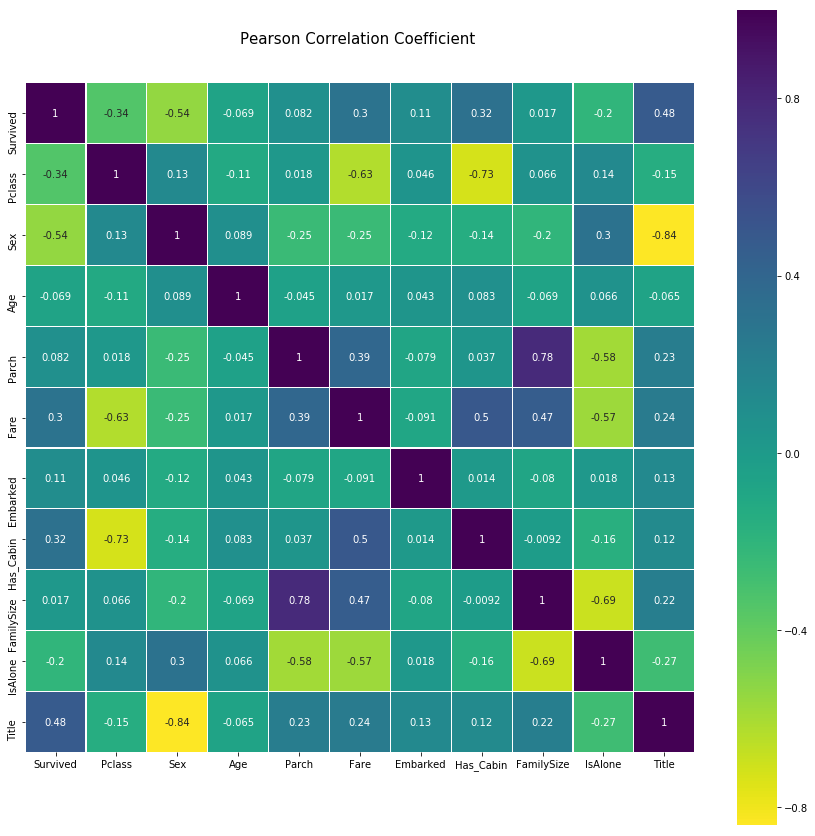

In [124]:
colormap=plt.cm.viridis_r
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation Coefficient ',y=1.05,size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

This heatmap is very useful as an initial observation because you can easily get an idea of the predictive value of each feature. In this case, Sex and Title show the highest correlations (in absolute terms) with the class (Survived): 0.54 and 0.49 respectively. But the absolute correlation between both is also very high (0.86, the highest in our dataset), so they are probably carrying the same information and using the two as inputs for the same model wouldn't be a good idea. High chances are one of them will be used for the first node in our final decision tree, so let's first explore further these features and compare them.

You can easily compare features and their relationship with the class by grouping them and calculating some basic statistics for each group. The code below does exactly this in one line, and explains the meaning of each metric when working with a binary class.

In [125]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])
# Since "Survived" is a binary class (0 or 1), these metrics grouped by the Title feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived

# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

Survived           
           mean count  sum
Title                     
0.0    1.000000     4    4
1.0    0.156673   517   81
2.0    0.575000    40   23
3.0    0.792000   125   99
4.0    0.697802   182  127
5.0    0.347826    23    8

In [126]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])
# Since Survived is a binary feature, this metrics grouped by the Sex feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived
    
# sex_mapping = {{'female': 0, 'male': 1}} 

Survived           
         mean count  sum
Sex                     
0    0.742038   314  233
1    0.188908   577  109

In [127]:
# Let's use our 'original_train' dataframe to check the sex distribution for each title.
# We use copy() again to prevent modifications in out original_train dataset
title_and_sex = original_train.copy()[['Name', 'Sex']]

# Create 'Title' feature
title_and_sex['Title'] = title_and_sex['Name'].apply(get_title)

# Map 'Sex' as binary feature
title_and_sex['Sex'] = title_and_sex['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Table with 'Sex' distribution grouped by 'Title'
title_and_sex[['Title', 'Sex']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

# Since Sex is a binary feature, this metrics grouped by the Title feature represent:
    # MEAN: percentage of men
    # COUNT: total observations
    # SUM: number of men

Sex           
              mean count  sum
Title                        
Capt      1.000000     1    1
Col       1.000000     2    2
Countess  0.000000     1    0
Don       1.000000     1    1
Dr        0.857143     7    6
Jonkheer  1.000000     1    1
Lady      0.000000     1    0
Major     1.000000     2    2
Master    1.000000    40   40
Miss      0.000000   182    0
Mlle      0.000000     2    0
Mme       0.000000     1    0
Mr        1.000000   517  517
Mrs       0.000000   125    0
Ms        0.000000     1    0
Rev       1.000000     6    6
Sir       1.000000     1    1

We find that, excepting for a single observation (a female with 'Dr' title), all the observations for a given Title share the same Sex. Therefore the feature Title is capturing all the information present in Sex. In addition, Title may be more valuable to our task by capturing other characteristics of the individuals like age, social class, personality, ...

It's true that by regrouping rare titles into a single category, we are losing some information regarding Sex. We could create two categories "Rare Male" and "Rare Female", but the separation will be almost meaningless due to the low occurrence of "Rare" Titles (2.6%, 23 out of 891 samples).

Thanks to this in-depth analysis of the Sex and Title features we've seen that, even if the correlation of the feature Sex with the class Survived was higher, Title is a richer feature because it carries the Sex information but also adds other characteristics. Therefore is very likely that Title is going to be the first feature in our final decision tree, making Sex useless after this initial split

# Gini Impurity

Before start working with Decision Trees, let's briefly explain how they work. The goal of their learning algorithms is always to find the best split for each node of the tree. But measuring the "goodness" of a given split is a subjective question so, in practice, different metrics are used for evaluating splits. One commonly used metric is Information Gain. The sklearn library we're gonna use implements Gini Impurity, another common measure, so let’s explain it.

Gini Impurity measures the disorder of a set of elements. It is calculated as the probability of mislabelling an element assuming that the element is randomly labelled according the the distribution of all the classes in the set. Decision Trees will try to find the split which decreases Gini Impurity the most across the two resulting nodes. For the titanic example it can be calculated as follows (code should be explicit enough):

In [128]:
# Define function to calculate Gini Impurity
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity


Use sex and title to figure out which one reduces the gini impurity.et's use our Sex and Title features as an example and calculate how much each split will decrease the overall weighted Gini Impurity. First, we need to calculate the Gini Impurity of the starting node including all 891 observations in our train dataset. Since only 342 observations survived, the survival probability is around 38,38% (342/891).



In [129]:
gini_impurity_starting_node = get_gini_impurity(342,891)
gini_impurity_starting_node

0.47301295786144265

We're now going to simulate both splits, calculate the impurity of resulting nodes and then obtain the weighted Gini Impurity after the split to measure how much each split has actually reduced impurity.

If we split by Sex, we'll have the two following nodes:

Node with men: 577 observations with only 109 survived
Node with women: 314 observations with 233 survived

In [130]:
gini_impurity_men=get_gini_impurity(109,577)
gini_impurity_men

0.3064437162277843

In [131]:
gini_impurity_women=get_gini_impurity(233,314)
gini_impurity_women

0.3828350034484158

In [132]:
# Gini Impurity decrease if node splited by Sex
men_weight = 577/891
women_weight = 314/891
weighted_gini_impurity_sex_split = (gini_impurity_men * men_weight) + (gini_impurity_women * women_weight)

sex_gini_decrease = weighted_gini_impurity_sex_split - gini_impurity_starting_node
sex_gini_decrease

-0.13964795747285214

If we split by Title == 1 (== Mr), we'll have the two following nodes:

Node with only Mr: 517 observations with only 81 survived
Node with other titles: 374 observations with 261 survived

In [133]:
# Gini Impurity decrease of node for observations with Title == 1 == Mr
gini_impurity_title_1 = get_gini_impurity(81, 517)
gini_impurity_title_1

0.26425329886377663

In [134]:
# Gini Impurity decrease if node splited for observations with Title != 1 != Mr
gini_impurity_title_others = get_gini_impurity(261, 374)
gini_impurity_title_others


0.42170207898424317

In [135]:
# Gini Impurity decrease if node splited for observations with Title == 1 == Mr
title_1_weight = 517/891
title_others_weight = 374/891
weighted_gini_impurity_title_split = (gini_impurity_title_1 * title_1_weight) + (gini_impurity_title_others * title_others_weight)

title_gini_decrease = weighted_gini_impurity_title_split - gini_impurity_starting_node
title_gini_decrease

-0.14267004758907514

In [136]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image,ImageDraw,ImageFont


In [138]:
cv = KFold(n_splits=10)
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1,max_attributes+1)

for depth in depth_range:
    fold_accuracy =[]
    tree_model =  tree.DecisionTreeClassifier(max_depth=depth)
    for train_fold, valid_fold in cv.split(train):
        f_train =  train.loc[train_fold]
        f_valid = train.loc[valid_fold]
        X=f_train.drop(['Survived'], axis=1)
        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train['Survived']) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))    

Max Depth  Average Accuracy
        1          0.782285
        2          0.771099
        3          0.815918
        4          0.819288
        5          0.818177
        6          0.809226
        7          0.802534
        8          0.803633
        9          0.803658
       10          0.803683


In [139]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1).values 
x_test = test.values

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
draw.text((10, 0), # Drawing offset (position)
          '"Title <= 1.5" corresponds to "Mr." title', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")

# Code to check available fonts and respective paths
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

NameError: name 'PassengerId' is not defined